## Web Scraping (Beautiful Soup)
## Word Cloud with Pyhton

In [1]:
import urllib.request
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [2]:
# Parameters
# Before doing a web scraping, read "terms and conditions" at website. See also permissions at http://www.'webpage'/robots.txt
webpage = "http://www.diariocoimbra.pt"

# Sometimes, it will be needed to add an decoder.
decoder = 'utf-8'


with urllib.request.urlopen(webpage) as url:
    page = url.read()#.decode(decoder)

In [3]:
# Parse variable 'page' and store as Beautiful Soup object
soup = BeautifulSoup(page, "html.parser")

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [4]:
# Indicate the parameters to get all news-resume
resultSet = soup.find_all("div", class_='col-md-12 news_resume')

In [5]:
# Create a list for each news-resume, with a cleaning step
list = [re.sub(r'[^\w\s]','',re.sub('\n', '', i.text)) for i in resultSet]


In [6]:
# Create a pandas DataFrame

df = pd.DataFrame({'news':list})


In [7]:
# Drop the columns where all elements are NaN
data = df['news'].dropna()

In [8]:
# Set stopwords
stopwords= set(STOPWORDS)

# Set a list of portuguese stopwords 
new_words = []

web_stopwords_txt = 'https://gist.githubusercontent.com/alopes/5358189/raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt'



with urllib.request.urlopen(web_stopwords_txt) as url2:
    f = url2.read().decode(decoder)


pt_stopwords = f.split()
    
new_stopwords = stopwords.union(pt_stopwords)


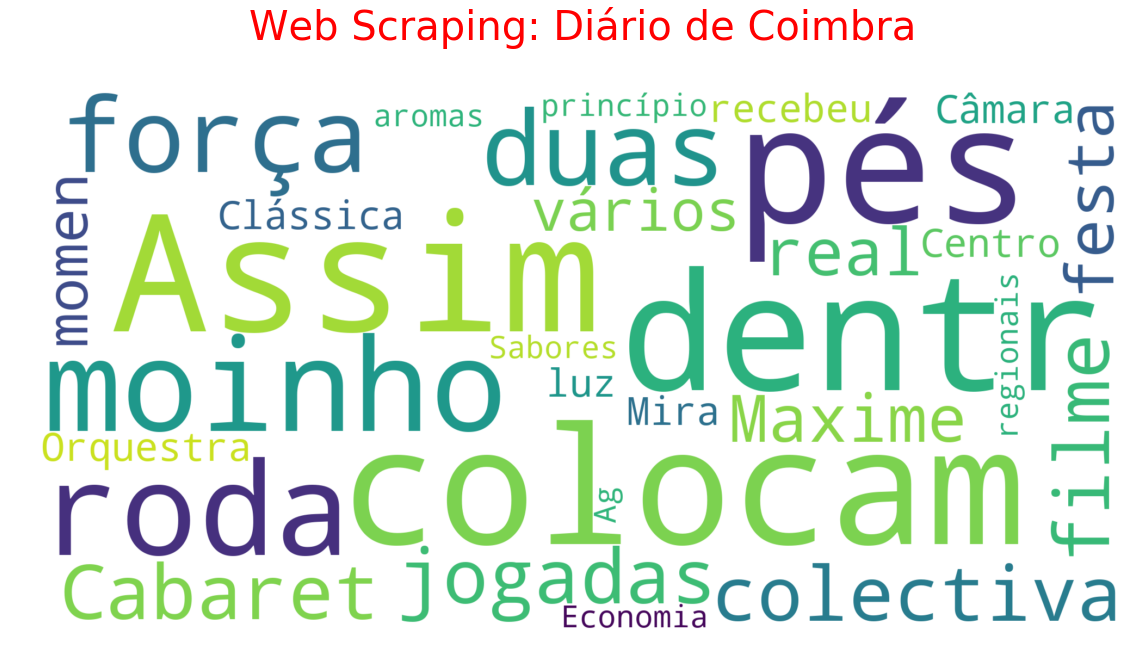

In [9]:
# Plot the WordCloud (if needed, adjust parameters)
plt.figure(figsize=(20,10))
wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               stopwords=new_stopwords,
               max_words= 30,
               width=2000, 
               height=1000,
               normalize_plurals= True).generate(str(data))


plt.title("Web Scraping: Diário de Coimbra\n", fontsize=40, color="red")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()